![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

In [4]:
os.chdir('/content/drive/MyDrive/Computer Vision - Assignment 2')
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Computer Vision - Assignment 2/mobile-images-20210309T085357Z-001.zip','r') as z:
  z.extractall()

In [7]:
os.listdir()
# checking if extraction happened correctly

['mobile-images-20210309T085357Z-001.zip',
 'R8 Internal Lab CNN - Tury.ipynb',
 'mobile-images']

In [8]:
os.chdir('mobile-images')

In [9]:
os.listdir()
# seeing folders within the dataset folder

['yes-mobile', 'no-mobile']

### How many images are there in each class

In [10]:
import cv2
# for image reading

no_mobile_path = '/content/drive/MyDrive/Computer Vision - Assignment 2/mobile-images/no-mobile'
yes_mobile_path = '/content/drive/MyDrive/Computer Vision - Assignment 2/mobile-images/yes-mobile'
no_mobile_count = len(os.listdir(no_mobile_path))
yes_mobile_count = len(os.listdir(yes_mobile_path))
print('Images in "No Mobile" label: ',no_mobile_count)
print('Images in "Yes Mobile" label: ',yes_mobile_count)

Images in "No Mobile" label:  121
Images in "Yes Mobile" label:  124


###  What is the percentage of images with and without mobile phone in the data

In [12]:
print('Percentage of Images in "No Mobile" label: ',(no_mobile_count/(no_mobile_count+yes_mobile_count))*100,'%')
print('Percentage of Images in "Yes Mobile" label: ',(yes_mobile_count/(no_mobile_count+yes_mobile_count))*100,'%')

Percentage of Images in "No Mobile" label:  49.38775510204081 %
Percentage of Images in "Yes Mobile" label:  50.61224489795918 %


### Visualise a few images to understand

(90, 90, 3)


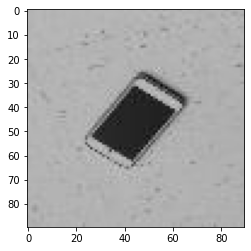

In [17]:
g = 10
yes_mobile_list = os.listdir(yes_mobile_path)
rand_yes_img = cv2.imread(yes_mobile_path+'/'+yes_mobile_list[g])
plt.imshow(rand_yes_img)
# visualising an 'Yes Mobile' image

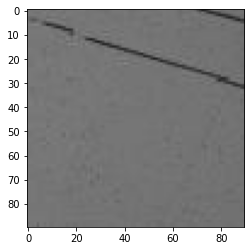

In [18]:
h = 10
no_mobile_list = os.listdir(no_mobile_path)
rand_no_img = cv2.imread(no_mobile_path+'/'+no_mobile_list[g])
plt.imshow(rand_no_img)
# visualising an 'No Mobile' image

### Check shape and size of the images

In [19]:
print(rand_yes_img.shape)
print(rand_no_img.shape)
# checking size of images in both classes

(90, 90, 3)
(90, 90, 3)


### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [32]:
X_yes = []
y_yes = []

for i in yes_mobile_list:
  img = cv2.imread(os.path.join(yes_mobile_path,i))
  img = cv2.resize(img,(128,128))
  X_yes.append(img)
  y_yes.append(1)

# Saving images and label for 'Yes Mobile' class

In [33]:
X_no = []
y_no = []

for i in no_mobile_list:
  img = cv2.imread(os.path.join(no_mobile_path,i))
  img = cv2.resize(img,(128,128))
  X_no.append(img)
  y_no.append(0)

# Saving images and label for 'No Mobile' class

### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [36]:
X = np.concatenate((X_yes,X_no),axis=0)
y = np.concatenate((y_yes,y_no),axis=0)

print(X.shape)
print(y.shape)

(245, 128, 128, 3)
(245,)


### Shuffle the above data and labels ( Data and label should be in sync)

In [37]:
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=10)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

Class:  0
Image: 


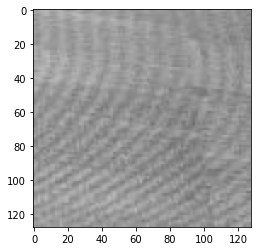

Class:  1
Image: 


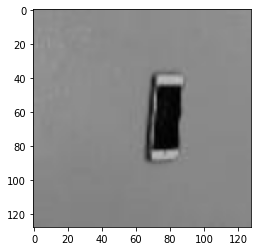

Class:  1
Image: 


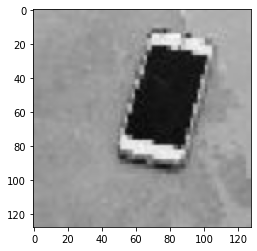

Class:  1
Image: 


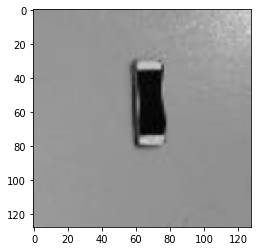

Class:  1
Image: 


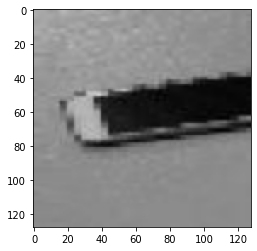

Class:  1
Image: 


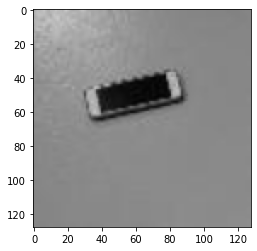

Class:  1
Image: 


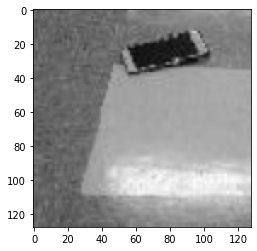

Class:  0
Image: 


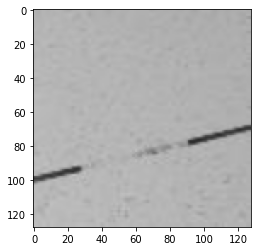

Class:  1
Image: 


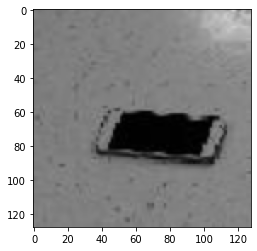

Class:  1
Image: 


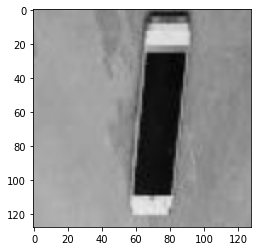

In [41]:
for i in range(10):
  print('Class: ', y[i])
  print('Image: ')
  plt.imshow(X[i])
  plt.show()

In [51]:
#  Alternate approach:
#  for i in range(10):
#   plt.subplot(5,2,i+1)
#   plt.imshow(X[i])
#   plt.xlabel(y[i])

### Split the data into train and test

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

### Print shape of the X train and X test data

In [125]:
print('Shape of X train data: ',X_train.shape)
print('Shape of X test data: ',X_test.shape)

Shape of X train data:  (171, 128, 128, 3)
Shape of X test data:  (74, 128, 128, 3)


### Normalize the data by dividing by 255

In [126]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [127]:
y_train
# before OHE

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [128]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=2)

In [129]:
y_train
# after OHE

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [143]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model = Sequential()
# initialising the model
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
# taking a look at the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 460808    
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [144]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [145]:
n_epochs = 50
batch_size = 16
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 1s 32ms/step - loss: 0.8784 - accuracy: 0.4879 - val_loss: 0.6919 - val_accuracy: 0.4865
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.5117 - val_loss: 0.6898 - val_accuracy: 0.7973
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6794 - accuracy: 0.6518 - val_loss: 0.6185 - val_accuracy: 0.7568
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.5855 - accuracy: 0.6844 - val_loss: 0.4465 - val_accuracy: 0.8514
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.4355 - accuracy: 0.8061 - val_loss: 0.4655 - val_accuracy: 0.8243
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.4705 - accuracy: 0.7976 - val_loss: 0.4388 - val_accuracy: 0.8243
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 0.3096 - accuracy: 0.8439 - val_loss: 0.6626 - val_accuracy: 0.6486
Epoch 8/50
11

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [146]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 1.7855 - accuracy: 0.8378


[1.7855072021484375, 0.837837815284729]

### Predict label data of the test data and check confusion matrix

In [147]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
testY = np.argmax(y_test,axis=1)
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix below: \n')
print(confusion_matrix(testY,y_pred))
print('\n','^'*100)
print('\nClassification Report below: \n')
print(classification_report(testY,y_pred))

Confusion Matrix below: 

[[32  6]
 [ 6 30]]

 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Classification Report below: 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.83      0.83      0.83        36

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



### Display test images and their predicted label for a few samples

Actual Label: 1; Predicted Label: 1


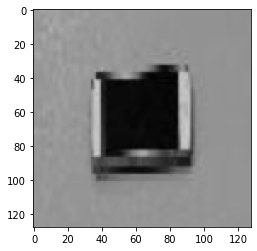

Actual Label: 1; Predicted Label: 1


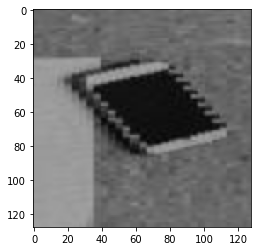

Actual Label: 1; Predicted Label: 1


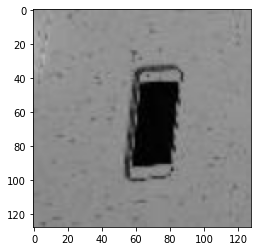

Actual Label: 1; Predicted Label: 1


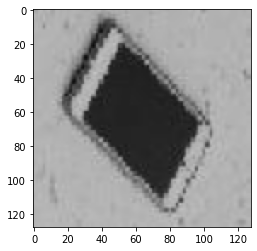

Actual Label: 0; Predicted Label: 0


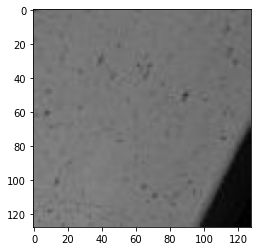

Actual Label: 1; Predicted Label: 0


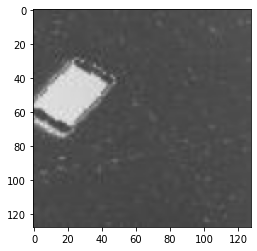

Actual Label: 1; Predicted Label: 1


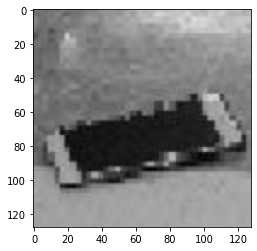

Actual Label: 0; Predicted Label: 0


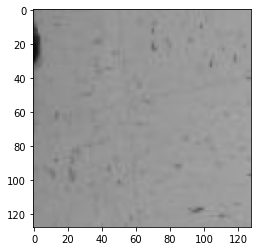

Actual Label: 1; Predicted Label: 1


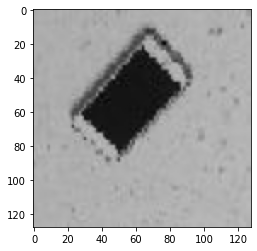

Actual Label: 0; Predicted Label: 0


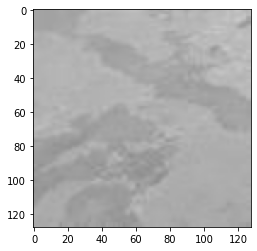

In [148]:
# looking at a few samples
for i in range (10):
  pred = y_pred[i]
  actual = testY[i]
  print('Actual Label: {}; Predicted Label: {}'.format(actual,pred))
  plt.imshow(X_test[i])
  plt.show()

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

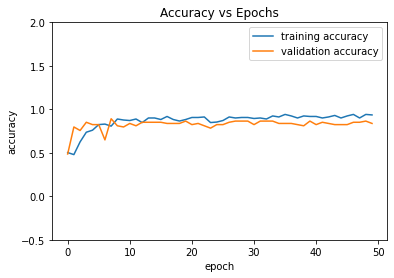

In [149]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')
plt.show()

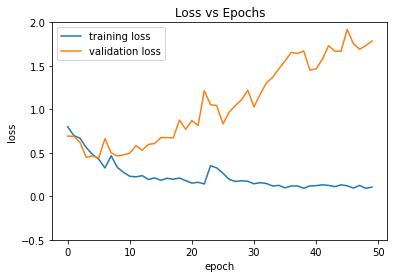

In [150]:
fig, axs = plt.subplots()
axs.set_ylim([-0.5,2])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss','validation loss'], loc='best')
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings

* In this very basic model that we have built, we can see that the overfit is quite clearly visible. The training accuracy jumps from 0.48 to 0.80 range in just 5 epochs.
* In 50 epochs, the training accuracy shoots up to 0.92, yet the validation accuracy remains at 0.83 or so.
* We can also find that the results are fairly good for a basic Conv model since the classes are well balanced and the image data is well furnished with minimal noise.
* This model may behave more accurately if we let it run for more epochs, but it won't solve the overfit issue. So, we'll look at probable adjustments in the next section.

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

#### Trying the same model with SGD optimizer

In [151]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model1 = Sequential()
# initialising the model
model1.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(8,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2,activation='softmax'))
# taking a look at the model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 460808    
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0

In [152]:
model1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [153]:
n_epochs = 50
batch_size = 16
history1 = model1.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 1s 52ms/step - loss: 0.7032 - accuracy: 0.5975 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6909 - accuracy: 0.5203 - val_loss: 0.6940 - val_accuracy: 0.4865
Epoch 3/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6918 - accuracy: 0.5477 - val_loss: 0.6935 - val_accuracy: 0.4865
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6970 - accuracy: 0.4288 - val_loss: 0.6893 - val_accuracy: 0.5405
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6887 - accuracy: 0.5401 - val_loss: 0.6910 - val_accuracy: 0.4865
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6879 - accuracy: 0.5911 - val_loss: 0.6919 - val_accuracy: 0.4865
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6882 - accuracy: 0.5386 - val_loss: 0.6881 - val_accuracy: 0.4865
Epoch 8/50
11

In [155]:
model1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.6011 - accuracy: 0.7432


[0.6011420488357544, 0.7432432174682617]

It is clear that the exact same model performs much better with adam optimizer (0.83 accuracy) than with sgd optimizer (0.74 accuracy)

#### Trying a newer model with more dense layers and dropouts

In [156]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model2 = Sequential()
# initialising the model
model2.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(16,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2,activation='softmax'))
# taking a look at the model
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                921616    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [157]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [158]:
n_epochs = 50
batch_size = 16
history2 = model2.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 1s 32ms/step - loss: 0.7506 - accuracy: 0.4512 - val_loss: 0.6922 - val_accuracy: 0.5135
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.7022 - accuracy: 0.4687 - val_loss: 0.6936 - val_accuracy: 0.4865
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5197 - val_loss: 0.6936 - val_accuracy: 0.4865
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6922 - accuracy: 0.5072 - val_loss: 0.6919 - val_accuracy: 0.5541
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6836 - accuracy: 0.5395 - val_loss: 0.6574 - val_accuracy: 0.5270
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6491 - accuracy: 0.5980 - val_loss: 0.5707 - val_accuracy: 0.6486
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6414 - accuracy: 0.5711 - val_loss: 0.5407 - val_accuracy: 0.8378
Epoch 8/50
11

In [159]:
model.evaluate(X_test,y_test)
model2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.7793 - accuracy: 0.8784


[0.7792901992797852, 0.8783783912658691]

We can see that the addition of another dense layer along with dropout has resulted in a higher accuracy (0.87 as opposed to 0.83 earlier)

#### Trying a newer model with padding in the Conv layers

In [160]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model3 = Sequential()
# initialising the model
model3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(16,activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(8,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(2,activation='softmax'))
# taking a look at the model
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1048592   
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [161]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [162]:
n_epochs = 50
batch_size = 16
history3 = model3.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 1s 61ms/step - loss: 0.8095 - accuracy: 0.5513 - val_loss: 0.6828 - val_accuracy: 0.4865
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6877 - accuracy: 0.4929 - val_loss: 0.6635 - val_accuracy: 0.5135
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6284 - accuracy: 0.6338 - val_loss: 0.5383 - val_accuracy: 0.7838
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 0.5822 - accuracy: 0.6334 - val_loss: 0.4679 - val_accuracy: 0.8649
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.4770 - accuracy: 0.7241 - val_loss: 0.4417 - val_accuracy: 0.8378
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.4540 - accuracy: 0.7494 - val_loss: 0.4595 - val_accuracy: 0.8378
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 0.3910 - accuracy: 0.8010 - val_loss: 0.5250 - val_accuracy: 0.8243
Epoch 8/50
11

In [163]:
model2.evaluate(X_test,y_test)
model3.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 1.7780 - accuracy: 0.8784


[1.7780171632766724, 0.8783783912658691]

It is evident that just adding padding to the conv layers hasn't led to an increase in accuracy

#### Trying a newer model with more Conv layers

In [164]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model4 = Sequential()
# initialising the model
model4.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(16,activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(8,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(2,activation='softmax'))
# taking a look at the model
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       2

In [165]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [166]:
n_epochs = 50
batch_size = 16
history4 = model4.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 1s 56ms/step - loss: 0.7029 - accuracy: 0.5246 - val_loss: 0.6933 - val_accuracy: 0.3784
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 0.6954 - accuracy: 0.4542 - val_loss: 0.6933 - val_accuracy: 0.4865
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 0.6929 - accuracy: 0.4866 - val_loss: 0.6933 - val_accuracy: 0.4865
Epoch 4/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4852 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 5/50
11/11 [==============================] - 0s 18ms/step - loss: 0.6925 - accuracy: 0.5412 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 6/50
11/11 [==============================] - 0s 19ms/step - loss: 0.6936 - accuracy: 0.4801 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 7/50
11/11 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 8/50
11

In [167]:
model3.evaluate(X_test,y_test)
model4.evaluate(X_test,y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.6941 - accuracy: 0.4865


[0.6940940618515015, 0.4864864945411682]

It seems that adding 2 more Conv layers has drastically decreased the accuracy by almost half its original value 

#### Trying a newer model based on model 3 with hyperparameter tuning

In [168]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model5 = Sequential()
# initialising the model
model5.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Flatten())
model5.add(Dense(16,activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(8,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(2,activation='softmax'))
# taking a look at the model
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1048592   
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [169]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [170]:
n_epochs = 50
batch_size = 32
history5 = model5.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
6/6 [==============================] - 1s 54ms/step - loss: 0.7697 - accuracy: 0.4756 - val_loss: 0.6930 - val_accuracy: 0.5135
Epoch 2/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6918 - accuracy: 0.5940 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5149 - val_loss: 0.6935 - val_accuracy: 0.4865
Epoch 4/50
6/6 [==============================] - 0s 28ms/step - loss: 0.6908 - accuracy: 0.5529 - val_loss: 0.6933 - val_accuracy: 0.5135
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6982 - accuracy: 0.5191 - val_loss: 0.6929 - val_accuracy: 0.4865
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.6911 - accuracy: 0.5014 - val_loss: 0.6885 - val_accuracy: 0.4865
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6874 - accuracy: 0.5343 - val_loss: 0.6850 - val_accuracy: 0.4865
Epoch 8/50
6/6 [===========

In [171]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model6 = Sequential()
# initialising the model
model6.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Flatten())
model6.add(Dense(16,activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(8,activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(2,activation='softmax'))
# taking a look at the model
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1048592   
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

In [172]:
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [175]:
n_epochs = 50
batch_size = 8
history6 = model6.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/50
22/22 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.5146 - val_loss: 0.6944 - val_accuracy: 0.4865
Epoch 2/50
22/22 [==============================] - 0s 11ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6943 - val_accuracy: 0.4865
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5146 - val_loss: 0.6944 - val_accuracy: 0.4865
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6943 - val_accuracy: 0.4865
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6943 - val_accuracy: 0.4865
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6944 - val_accuracy: 0.4865
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5146 - val_loss: 0.6943 - val_accuracy: 0.4865
Epoch 8/50
22/22 [

In [176]:
model3.evaluate(X_test,y_test)
model5.evaluate(X_test,y_test)
model6.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.4865


[0.6947798728942871, 0.4864864945411682]

It shows that model 3 is our best performing model, so let's run it for more epochs and see if it performs any better

In [177]:
n_epochs = 200
batch_size = 16
history7 = model3.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/200
11/11 [==============================] - 0s 22ms/step - loss: 0.1597 - accuracy: 0.9532 - val_loss: 1.7737 - val_accuracy: 0.8378
Epoch 2/200
11/11 [==============================] - 0s 18ms/step - loss: 0.1490 - accuracy: 0.9415 - val_loss: 1.6855 - val_accuracy: 0.8514
Epoch 3/200
11/11 [==============================] - 0s 17ms/step - loss: 0.1269 - accuracy: 0.9708 - val_loss: 1.7336 - val_accuracy: 0.8514
Epoch 4/200
11/11 [==============================] - 0s 16ms/step - loss: 0.1682 - accuracy: 0.9474 - val_loss: 1.7534 - val_accuracy: 0.8514
Epoch 5/200
11/11 [==============================] - 0s 16ms/step - loss: 0.1765 - accuracy: 0.9298 - val_loss: 1.8361 - val_accuracy: 0.8243
Epoch 6/200
11/11 [==============================] - 0s 16ms/step - loss: 0.1392 - accuracy: 0.9649 - val_loss: 2.0941 - val_accuracy: 0.8243
Epoch 7/200
11/11 [==============================] - 0s 16ms/step - loss: 0.1395 - accuracy: 0.9591 - val_loss: 2.3954 - val_accuracy: 0.8243
Epoch 

In [178]:
model3.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 7.3095 - accuracy: 0.8108


[7.309476375579834, 0.8108108043670654]

With increasing epochs the accuracy is falling down for our best performing model, which shows we have a serious overfit issue

#### Trying a final model with increased hidden layers and dropouts

In [179]:
tensorflow.keras.backend.clear_session()
# clearing out any model in memory, if any
model8 = Sequential()
# initialising the model
model8.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(Flatten())
model8.add(Dense(64,activation='relu'))
model8.add(Dropout(0.6))
model8.add(Dense(32,activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(16,activation='relu'))
model8.add(Dropout(0.4))
model8.add(Dense(8,activation='relu'))
model8.add(Dropout(0.3))
model8.add(Dense(2,activation='softmax'))
# taking a look at the model
model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4194368   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [180]:
model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
n_epochs = 100
batch_size = 16
history8 = model8.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 1s 53ms/step - loss: 1.8160 - accuracy: 0.4923 - val_loss: 0.6928 - val_accuracy: 0.4865
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 0.6896 - accuracy: 0.5407 - val_loss: 0.6916 - val_accuracy: 0.4865
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 0.7101 - accuracy: 0.5381 - val_loss: 0.6871 - val_accuracy: 0.4865
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 0.6895 - accuracy: 0.4606 - val_loss: 0.6641 - val_accuracy: 0.4865
Epoch 5/100
11/11 [==============================] - 0s 15ms/step - loss: 0.6769 - accuracy: 0.5569 - val_loss: 0.6559 - val_accuracy: 0.4865
Epoch 6/100
11/11 [==============================] - 0s 16ms/step - loss: 0.6619 - accuracy: 0.5022 - val_loss: 0.6366 - val_accuracy: 0.4865
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 0.6434 - accuracy: 0.5612 - val_loss: 0.6233 - val_accuracy: 0.4865
Epoch 

In [186]:
print('All model performance below:')
model.evaluate(X_test,y_test)
model1.evaluate(X_test,y_test)
model2.evaluate(X_test,y_test)
model3.evaluate(X_test,y_test)
model4.evaluate(X_test,y_test)
model5.evaluate(X_test,y_test)
model6.evaluate(X_test,y_test)
model8.evaluate(X_test,y_test)

All model performance below:
3/3 [==============================] - 0s 7ms/step - loss: 4.8841 - accuracy: 0.8784


[4.884106636047363, 0.8783783912658691]

Hence, we can say model2 is our best performing model since it achieves the same accuracy as model8, but with lesser number of layers and lower epochs.